In [1]:
print("Hello World")

Hello World


 ## Real Estate- Price Predicator

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("data.csv")

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
 housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285615,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704265,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

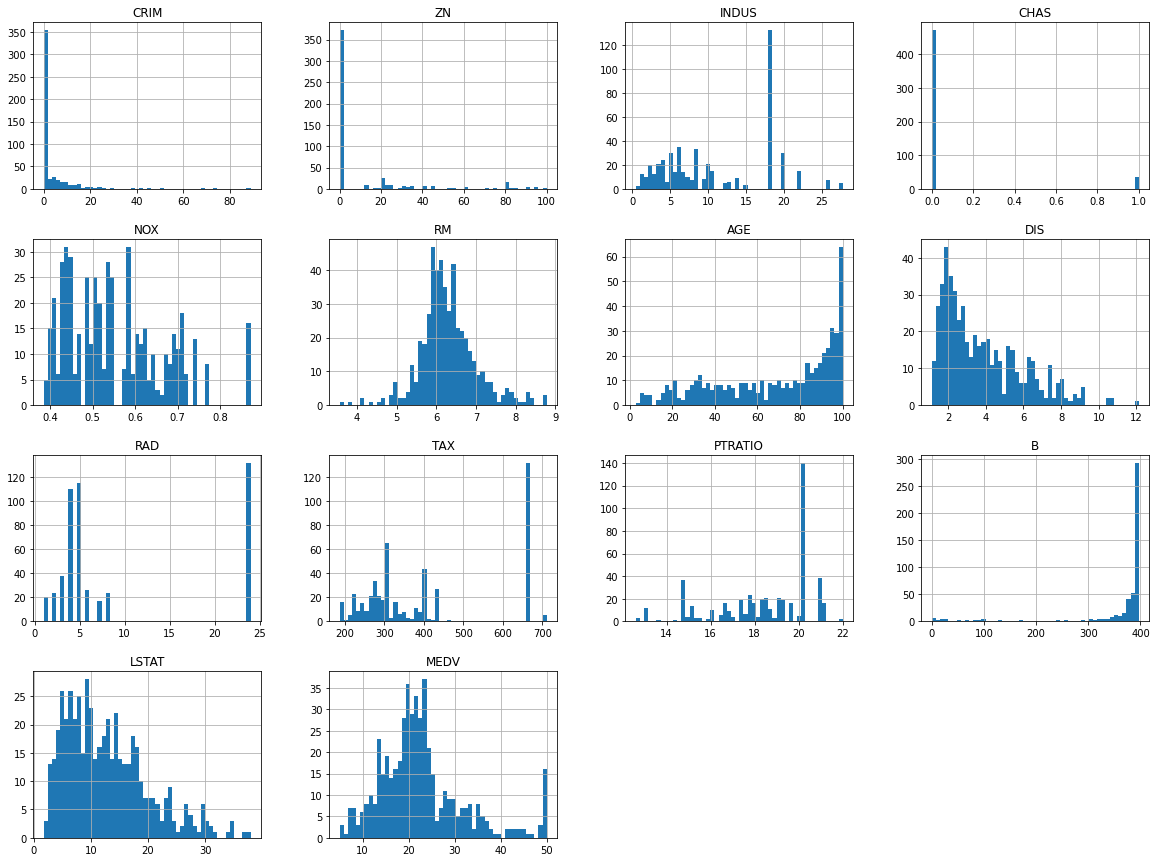

In [8]:
%matplotlib inline 
import matplotlib.pyplot as pit
housing.hist(bins=50,figsize=(20,15))

 ## Train-Test Splitting

In [9]:

import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size= int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set,test_set=split_train_test(housing,0.3)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 355
Rows in test set:151



In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.3,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 354
Rows in test set:152



In [13]:
## stratisfied sampling we have to do on CHAS basis

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index , test_index in split.split(housing,housing['CHAS']):
    strat_train_set =housing.loc[train_index]
    strat_test_set=housing.loc[test_index]




In [14]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,354.000000,354.000000,354.000000,354.000000,354.000000,351.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.630612,11.026836,11.361582,0.067797,0.559219,6.268382,68.565819,3.691179,9.593220,412.209040,18.401977,355.270565,12.734633,22.420621
std,8.366787,22.270612,6.904776,0.251752,0.118326,0.727458,28.673784,2.041348,8.712178,167.985772,2.157488,93.628356,7.177097,9.093443
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.920000,5.000000
25%,0.085013,0.000000,5.190000,0.000000,0.450000,5.876500,43.650000,2.042000,4.000000,281.750000,17.075000,374.710000,6.802500,17.025000
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.219000,77.950000,3.040100,5.000000,346.500000,18.900000,391.065000,11.650000,21.050000
75%,3.689388,12.500000,18.100000,0.000000,0.631000,6.627000,94.100000,4.941025,24.000000,666.000000,20.200000,395.675000,16.930000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000,50.000000


In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.000000,152.000000,152.000000,152.000000,152.000000,150.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.573725,12.148026,10.613224,0.072368,0.544158,6.325940,68.596053,4.036936,9.447368,398.986842,18.580263,359.942632,12.463092,22.794079
std,9.153501,25.666405,6.749238,0.259953,0.109618,0.647287,26.979177,2.236776,8.723713,170.010284,2.184262,85.824235,7.076324,9.459445
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,187.000000,12.600000,3.650000,1.730000,5.000000
25%,0.069928,0.000000,5.130000,0.000000,0.448000,5.935250,46.975000,2.190675,4.000000,276.000000,17.400000,376.462500,7.357500,17.100000
50%,0.245415,0.000000,8.140000,0.000000,0.519000,6.176000,76.600000,3.525050,5.000000,307.000000,19.200000,392.635000,10.810000,21.550000
75%,2.904685,0.000000,18.100000,0.000000,0.624000,6.614500,93.325000,5.494450,24.000000,666.000000,20.200000,396.900000,17.007500,27.025000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
strat_train_set['CHAS'].value_counts()

0    330
1     24
Name: CHAS, dtype: int64

In [17]:
 strat_test_set['CHAS'].value_counts()

0    141
1     11
Name: CHAS, dtype: int64

In [18]:
housing = strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677742
ZN         0.375873
B          0.342483
DIS        0.267162
CHAS       0.216682
AGE       -0.380330
RAD       -0.392128
CRIM      -0.398049
NOX       -0.425741
TAX       -0.478108
INDUS     -0.496780
PTRATIO   -0.511760
LSTAT     -0.734966
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

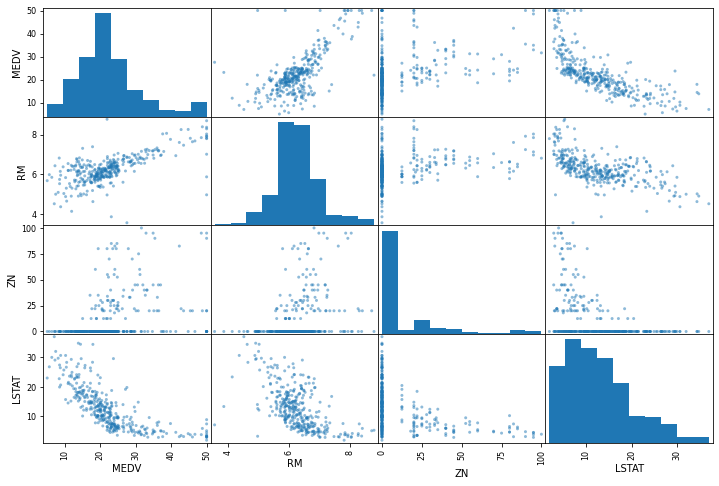

In [21]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

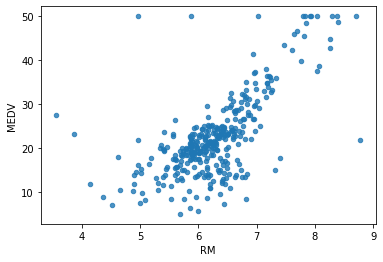

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out attribute combinations

In [23]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
301,0.03537,34.0,6.09,0,0.433,6.590,40.4,5.4917,7,329,16.1,395.75,9.50,22.0,49.924127
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3,50.904220
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5,37.998304
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1,63.446517
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5,104.388715


In [25]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677742
ZN         0.375873
B          0.342483
DIS        0.267162
CHAS       0.216682
AGE       -0.380330
RAD       -0.392128
CRIM      -0.398049
NOX       -0.425741
TAX       -0.478108
INDUS     -0.496780
PTRATIO   -0.511760
TAXRM     -0.542486
LSTAT     -0.734966
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

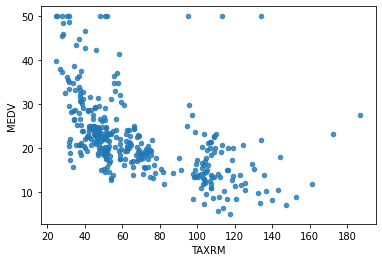

In [26]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [27]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Arrtirbues

In [28]:
# To take care of the missing attribus , you have three options :
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0,mean or median)..#
a=housing.dropna(subset=["RM"]) #option 1
a.shape

(351, 13)

In [29]:
housing.drop("RM",axis=1).shape  #option2
#NOte that there is no RM column and also that thd original housing dataframe will remain unchanged

(354, 12)

In [30]:
median=housing["RM"].median()
housing["RM"].fillna(median) #option 3
#note that the orginal housing dataframe will remain unchanged

301    6.590
309    5.972
337    5.895
74     6.273
429    6.380
       ...  
405    5.683
367    3.863
423    6.103
211    5.404
455    6.525
Name: RM, Length: 354, dtype: float64

In [31]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,351.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.630612,11.026836,11.361582,0.067797,0.559219,6.268382,68.565819,3.691179,9.593220,412.209040,18.401977,355.270565,12.734633
std,8.366787,22.270612,6.904776,0.251752,0.118326,0.727458,28.673784,2.041348,8.712178,167.985772,2.157488,93.628356,7.177097
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.920000
25%,0.085013,0.000000,5.190000,0.000000,0.450000,5.876500,43.650000,2.042000,4.000000,281.750000,17.075000,374.710000,6.802500
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.219000,77.950000,3.040100,5.000000,346.500000,18.900000,391.065000,11.650000
75%,3.689388,12.500000,18.100000,0.000000,0.631000,6.627000,94.100000,4.941025,24.000000,666.000000,20.200000,395.675000,16.930000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


In [32]:
housing.shape

(354, 13)

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_.shape

(13,)

In [35]:
imputer.statistics_

array([2.68880e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.79500e+01, 3.04010e+00, 5.00000e+00, 3.46500e+02,
       1.89000e+01, 3.91065e+02, 1.16500e+01])

In [36]:
X=imputer.transform(housing)

In [37]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.630612,11.026836,11.361582,0.067797,0.559219,6.267963,68.565819,3.691179,9.593220,412.209040,18.401977,355.270565,12.734633
std,8.366787,22.270612,6.904776,0.251752,0.118326,0.724374,28.673784,2.041348,8.712178,167.985772,2.157488,93.628356,7.177097
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.920000
25%,0.085013,0.000000,5.190000,0.000000,0.450000,5.878250,43.650000,2.042000,4.000000,281.750000,17.075000,374.710000,6.802500
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.219000,77.950000,3.040100,5.000000,346.500000,18.900000,391.065000,11.650000
75%,3.689388,12.500000,18.100000,0.000000,0.631000,6.623500,94.100000,4.941025,24.000000,666.000000,20.200000,395.675000,16.930000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


## Scikit-learn Design

In [39]:
#Classification  3 objectss only 
#Regression      code already 
#clustering
#Dimensionally
#Model selection
#Prepocessing

Primarily ,Three types of objects
1. Estimators - It estimates some parameter based on a dataset Eg imputer It as                 a fit method and tranform method.Fit method -- Fit the dataset                 and calculates internal parametersexample If some values from                 the set are missing then with help of imputer we can assign all                 the values median or mean in that place in this dataset we have                 done with " RM " 


2. Transformers - transform method takes input and return output based on the                    learning from fit(). It also has a convenience function called                  fir_tranform which fits and then tranforms.


3. Predicators - Linear Regression model is an example of predictor.fit() and                    predict() are two comman functions. It also gives score func                    which will evaluate the predications. 

## Feature Scaling

Here we have diffent values and values differ from different range and values
to  compare between them that we will do with help of Feature Scaling

Two Types of features scaling methods
1. Min-Max scaling ( Normalization )
           (value-min)/(max-min)  between 0 to 1
           Sklearn Provides a class called MixMaxScaler for this
           
2. Standardization 
            (value-min)/std
            Sklearn provides a class Standard Scaler for this

 ## Creating a Pipeline

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler()),
])

In [194]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [195]:
housing_num_tr.shape

(354, 13)

 ##  Selecting a desired model for Real Estates

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr ,housing_labels)

RandomForestRegressor()

In [197]:
some_data = housing.iloc[:5]

In [198]:
some_labels = housing_labels.iloc[:5]

In [199]:
prepared_data=my_pipeline.transform(some_data)

In [200]:
model.predict(prepared_data)

array([23.704, 20.465, 19.336, 24.043, 10.217])

In [201]:
list(some_labels)

[22.0, 20.3, 18.5, 24.1, 9.5]

## Evaluating the model

In [202]:
from sklearn.metrics import mean_squared_error
housing_predication=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predication)
lin_rmse=np.sqrt(lin_mse)

In [203]:
lin_mse

2.054822946327683

## Using better evaluation technique - Cross Validation

### We will divide data into 10 groups 

In [204]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels ,scoring = "neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)


In [205]:
rmse_scores

array([3.96508262, 2.62658501, 2.54563164, 4.58870532, 2.97427596,
       4.45568958, 3.21954761, 3.05941444, 4.09887601, 5.29809629])

In [206]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean : ",scores.mean())
    print("Standard deviation : ",scores.std())

In [207]:
print_scores(rmse_scores)

Scores: [3.96508262 2.62658501 2.54563164 4.58870532 2.97427596 4.45568958
 3.21954761 3.05941444 4.09887601 5.29809629]
Mean :  3.683190448611178
Standard deviation :  0.8828344525945802


In [208]:
from joblib import dump ,load
dump(model,'Real_Estate.joblib')

['Real_Estate.joblib']

## Testing the model on Test Data

In [209]:
X_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predications = model.predict(X_test_prepared) 
final_mse = mean_squared_error(y_test,final_predications)
final_rmse=np.sqrt(final_mse)
print(final_predications,list(y_test))

[19.778 47.32  20.486 24.586 18.632 23.762 21.43  14.55  19.701 17.466
 14.723 19.356 19.927 19.014 23.773 20.423 36.967 25.75  19.664 19.975
  7.893 26.568 10.473 21.392 36.811 42.327 16.772 24.379 20.515 19.644
 19.511 32.073 23.396 22.834 20.534 15.341 20.042 17.821 19.963 27.35
 34.476 19.558 17.954 21.766 19.4   20.259 43.522 21.537 28.703 14.764
 15.036 11.201 14.077 21.636 24.556 20.071  9.718 15.706 21.195 15.571
 21.259 22.217 34.3   31.734 21.165 20.162 22.642 35.169 20.947 31.447
 18.773 20.891 22.092 20.526 14.79  28.132 21.982 19.672 27.094 31.426
 31.459 14.903 21.506 35.866 11.322 24.895 19.319 30.003 12.725 15.196
 18.869 20.742 40.986 42.357 26.418 22.077 10.304 20.076 42.556 14.372
 15.092 20.597 23.717 25.119 42.675 23.183 13.761 45.534 22.787 14.545
 20.767 18.892 11.73  20.676 10.602 22.88  33.584 29.161 20.321 25.407
 35.577 14.408 20.557 35.105 10.656 23.195 24.265 15.214 21.748 44.065
 19.924 11.291 19.868 35.01   8.917 33.683 25.936 18.646 33.202 23.719
 11.291

In [210]:
final_rmse

3.140831511801662

In [211]:
prepared_data[0]

array([-0.43031222,  1.03300622, -0.76454953, -0.26967994, -1.06821718,
        0.44520174, -0.98367505,  0.88327391, -0.29807595, -0.49603496,
       -1.06848125,  0.43295357, -0.4513261 ])